## 유기동물 데이터를 이용한 입양률 예측

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics, preprocessing
from scipy.stats import itemfreq
import mglearn

C:\Users\Bit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1. Data Loading

In [2]:
df8=pd.read_csv("D:\KSA\project_imsi\lostAnimal_20180101_20181231_vol3.csv", encoding="euc-kr")
df7=pd.read_csv("D:\KSA\project_imsi\lostAnimal_20170101_20171231_vol3.csv", encoding="euc-kr")
df6=pd.read_csv("D:\KSA\project_imsi\lostAnimal_20160101_20161231_vol3.csv", encoding="euc-kr")
df5=pd.read_csv("D:\KSA\project_imsi\lostAnimal_20150101_20151231_vol3.csv", encoding="euc-kr")

In [3]:
df5 = df5.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
df6 = df6.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
df7 = df7.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
df8 = df8.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [4]:
df5.tail(1)

,age(before),age(after),careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
79744,2달추정(년생),0.0,경기도 수원시 팔달구 인계동 1135-7,정동물병원,031-239-7585,노선영,흑백,4.413740e+14,http://www.animal.go.kr/files/shelter/2014/12/...,2015-01-01,...,False,False,True,False,False,True,False,False,False,False


In [5]:
df6.tail(1)

,age(before),age(after),careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
88174,2개월추정(년생),0.0,경기도 안산시 상록구 청곡길 50 (부곡동) 한국야생동물보호협회,한국야생동물보호협회,031-296-0124,박태환,흑,4.414010e+14,http://www.animal.go.kr/files/shelter/2015/11/...,2016-01-01,...,False,False,True,False,False,False,False,False,False,True


In [6]:
df7.tail(1)

,age(before),age(after),careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
100722,2012(년생),5,서울특별시 양천구 목동 657번지 16호,강현림 동물병원,02-2642-9159,김영승,갈색,4.113140e+14,http://www.animal.go.kr/files/shelter/2016/10/...,2017-01-01,...,False,False,True,False,False,True,False,False,False,False


In [7]:
df8.tail(1)

,age(before),age(after),careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
80329,2015(년생),3,대구광역시 수성구 달구벌대로 2475 (범어동),제니스동물병원,053-756-8290,경제환경과,흰색,4.270000e+14,http://www.animal.go.kr/files/shelter/2017/12/...,2018-01-01,...,False,True,False,False,False,True,False,False,False,False


In [8]:
print(len(df5.columns))
print(len(df6.columns))
print(len(df7.columns))
print(len(df8.columns))

50
50
50
50


### 2. Data PreProcessing

#### - 데이터프레임 합치기 (15,16,17년도)

In [9]:
#df567 = pd.merge(df5,df6, how='outer')
df567 = pd.concat([df5,df6], ignore_index=True)
len(df567)

167920

In [10]:
df567 = pd.concat([df567,df7], ignore_index=True)
len(df567)

C:\Users\Bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


268643

In [11]:
df567.head(1)

,age(after),age(before),age_u,breed,breed.1,breed_Pre,careAddr,careNm,careNm_AD,careNm_C,...,processState_Pre,processState_R,sexCd,sexCd_F,sexCd_M,sexCd_Q,size,specialMark,weight(after),weight(before)
0,0.0,6개월추정(년생),유견기,믹스견,NaN,믹스견,충청남도 공주시 번영1로 54 (신관동),강북동물병원,False,False,...,D,False,F,True,False,False,소형,"유치잔존,옴 피부병,식욕부진",6.0,6(Kg)


In [12]:
df567.tail(1)

,age(after),age(before),age_u,breed,breed.1,breed_Pre,careAddr,careNm,careNm_AD,careNm_C,...,processState_Pre,processState_R,sexCd,sexCd_F,sexCd_M,sexCd_Q,size,specialMark,weight(after),weight(before)
268642,5.0,2012(년생),성견기,골든 리트리버,리트리버,NaN,서울특별시 양천구 목동 657번지 16호,강현림 동물병원,False,False,...,A,False,M,False,True,False,대형,치석ㅇ&#47552;으며온순하고잘따르나천방지축임,38.0,38(Kg)


In [13]:
df567.columns

Index(['age(after)', 'age(before)', 'age_u', 'breed', 'breed.1', 'breed_Pre',
       'careAddr', 'careNm', 'careNm_AD', 'careNm_C', 'careNm_CM',
       'careNm_ETC', 'careNm_H', 'careNm_O', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenMth', 'happenPlace',
       'happenWd', 'kind', 'kindCd', 'neuterYn', 'neuterYn_N', 'neuterYn_U',
       'neuterYn_Y', 'noticeComment', 'noticeEdt', 'noticeNo', 'noticeSdt',
       'officetel', 'orgNm', 'popfile', 'processState', 'processState_A',
       'processState_C', 'processState_D', 'processState_E',
       'processState_Pre', 'processState_R', 'sexCd', 'sexCd_F', 'sexCd_M',
       'sexCd_Q', 'size', 'specialMark', 'weight(after)', 'weight(before)'],
      dtype='object')

#### - 필요없는 컬럼 삭제

In [14]:
df = df567.drop(columns=['age(before)','colorCd','careAddr', 'careNm', 'careTel', 'chargeNm',
                      'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd','noticeComment',
                       'noticeNo', 'noticeSdt','officetel', 'popfile', 'processState',
                       'weight(before)', 'specialMark','breed', 'breed_Pre','breed.1'
                      ])

df_t = df8.drop(columns=['age(before)','colorCd','careAddr', 'careNm', 'careTel', 'chargeNm',
                      'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd','noticeComment',
                       'noticeNo', 'noticeSdt','officetel', 'popfile', 'processState',
                       'weight(before)', 'specialMark','breed', 'breed_Pre'
                      ])

#'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',

In [16]:
df.tail(2)

,age(after),age_u,careNm_AD,careNm_C,careNm_CM,careNm_ETC,careNm_H,careNm_O,happenMth,happenWd,...,processState_D,processState_E,processState_Pre,processState_R,sexCd,sexCd_F,sexCd_M,sexCd_Q,size,weight(after)
268641,1.0,유견기,False,False,False,False,True,False,1,Sunday,...,False,False,A,False,M,False,True,False,초소형,1.5
268642,5.0,성견기,False,False,False,False,True,False,1,Sunday,...,False,False,A,False,M,False,True,False,대형,38.0


In [17]:
df_t.tail(2)

,age(after),neuterYn,noticeEdt,orgNm,sexCd,weight(after),kind,happenWd,happenMth,size,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
80328,5,U,20180111,광주광역시 남구,M,3.5,0,Monday,1,소형,...,False,False,False,True,False,False,True,False,False,False
80329,3,Y,20180111,대구광역시 수성구,M,5.0,0,Monday,1,소형,...,False,True,False,False,False,True,False,False,False,False


In [18]:
print("15/16/17 데이터프레임 사용할 컬럼 갯수 : ",len(df.columns))
print("컬럼 이름 : ", df.columns)

print("18 데이터프레임 사용할 컬럼 갯수 : ",len(df_t.columns))
print("컬럼 이름 : ", df_t.columns)

15/16/17 데이터프레임 사용할 컬럼 갯수 :  29
컬럼 이름 :  Index(['age(after)', 'age_u', 'careNm_AD', 'careNm_C', 'careNm_CM',
       'careNm_ETC', 'careNm_H', 'careNm_O', 'happenMth', 'happenWd', 'kind',
       'neuterYn', 'neuterYn_N', 'neuterYn_U', 'neuterYn_Y', 'noticeEdt',
       'orgNm', 'processState_A', 'processState_C', 'processState_D',
       'processState_E', 'processState_Pre', 'processState_R', 'sexCd',
       'sexCd_F', 'sexCd_M', 'sexCd_Q', 'size', 'weight(after)'],
      dtype='object')
18 데이터프레임 사용할 컬럼 갯수 :  29
컬럼 이름 :  Index(['age(after)', 'neuterYn', 'noticeEdt', 'orgNm', 'sexCd',
       'weight(after)', 'kind', 'happenWd', 'happenMth', 'size', 'age_u',
       'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E', 'sexCd_M',
       'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
       'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
       'careNm_CM'],
      dtype='object')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268643 entries, 0 to 268642
Data columns (total 29 columns):
age(after)          268643 non-null float64
age_u               268643 non-null object
careNm_AD           268643 non-null bool
careNm_C            268643 non-null bool
careNm_CM           268643 non-null bool
careNm_ETC          268643 non-null bool
careNm_H            268643 non-null bool
careNm_O            268643 non-null bool
happenMth           268643 non-null int64
happenWd            268643 non-null object
kind                268643 non-null int64
neuterYn            268643 non-null object
neuterYn_N          268643 non-null bool
neuterYn_U          268643 non-null bool
neuterYn_Y          268643 non-null bool
noticeEdt           268643 non-null int64
orgNm               268643 non-null object
processState_A      268643 non-null bool
processState_C      268643 non-null bool
processState_D      268643 non-null bool
processState_E      268643 non-null bool
processState_P

In [20]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80330 entries, 0 to 80329
Data columns (total 29 columns):
age(after)          80330 non-null int64
neuterYn            80330 non-null object
noticeEdt           80330 non-null int64
orgNm               80330 non-null object
sexCd               80330 non-null object
weight(after)       80303 non-null float64
kind                80330 non-null int64
happenWd            80330 non-null object
happenMth           80330 non-null int64
size                80303 non-null object
age_u               80330 non-null object
processState_Pre    80330 non-null object
processState_C      80330 non-null bool
processState_A      80330 non-null bool
processState_D      80330 non-null bool
processState_R      80330 non-null bool
processState_E      80330 non-null bool
sexCd_M             80330 non-null bool
sexCd_F             80330 non-null bool
sexCd_Q             80330 non-null bool
neuterYn_Y          80330 non-null bool
neuterYn_N          80330 non-

#### - 결측치 처리

In [21]:
## 15/16/17년도 데이터프레임

#print(df.isnull().sum()) # 결측치 수
#df.isnull().any()
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
#print(df[df["breed_Pre"].isnull()][null_columns])        

#print(df['weight(after)'].isnull().sum())       
#print(df['size'].isnull().sum())                

size             886
weight(after)    886
dtype: int64

In [22]:
## 18년도 데이터프레임
null_columns=df_t.columns[df_t.isnull().any()]
df_t[null_columns].isnull().sum()


weight(after)    27
size             27
dtype: int64

In [23]:
# weight(after) : 나이별로 묶어서 중위값넣기
df["weight(after)"].fillna(df.groupby("age_u")["weight(after)"].transform("median"), inplace=True)
df_t["weight(after)"].fillna(df_t.groupby("age_u")["weight(after)"].transform("median"), inplace=True)

In [24]:
df.loc[pd.isnull(df["weight(after)"])]

,age(after),age_u,careNm_AD,careNm_C,careNm_CM,careNm_ETC,careNm_H,careNm_O,happenMth,happenWd,...,processState_D,processState_E,processState_Pre,processState_R,sexCd,sexCd_F,sexCd_M,sexCd_Q,size,weight(after)


In [25]:
df_t.loc[pd.isnull(df["weight(after)"])]

,age(after),neuterYn,noticeEdt,orgNm,sexCd,weight(after),kind,happenWd,happenMth,size,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM


In [26]:
# size : 몸무게가 비어서 전처리 되지 않은 행 재전처리
df.loc[df['weight(after)'] <= 3, 'size'] = '초소형'
df.loc[(df['weight(after)'] > 3 ) & (df['weight(after)'] <=9 ), 'size'] = '소형'
df.loc[(df['weight(after)'] > 9 ) & (df['weight(after)'] <=25 ), 'size'] = '중형'
df.loc[df['weight(after)'] > 25, 'size'] = '대형'

df_t.loc[df_t['weight(after)'] <= 3, 'size'] = '초소형'
df_t.loc[(df_t['weight(after)'] > 3 ) & (df_t['weight(after)'] <=9 ), 'size'] = '소형'
df_t.loc[(df_t['weight(after)'] > 9 ) & (df_t['weight(after)'] <=25 ), 'size'] = '중형'
df_t.loc[df_t['weight(after)'] > 25, 'size'] = '대형'

In [27]:
df.loc[pd.isnull(df["size"])]

,age(after),age_u,careNm_AD,careNm_C,careNm_CM,careNm_ETC,careNm_H,careNm_O,happenMth,happenWd,...,processState_D,processState_E,processState_Pre,processState_R,sexCd,sexCd_F,sexCd_M,sexCd_Q,size,weight(after)


In [28]:
df_t.loc[pd.isnull(df_t["size"])]

,age(after),neuterYn,noticeEdt,orgNm,sexCd,weight(after),kind,happenWd,happenMth,size,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM


In [29]:
# 동물 종 : 몇개 안되니 기타로 입력
#df['breed_Pre'].fillna("기타",inplace=True)
#df.loc[pd.isnull(df["breed_Pre"])]

In [30]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [31]:
null_columns=df_t.columns[df_t.isnull().any()]
df_t[null_columns].isnull().sum()

Series([], dtype: float64)

#### - neuterYn : 문자 -> 숫자

In [32]:
neuter_mapping = {"Y":0,"N":1,"U":2}
df['neuterYn'] = df['neuterYn'].map(neuter_mapping)
df_t['neuterYn'] = df_t['neuterYn'].map(neuter_mapping)

print(df.neuterYn[1:3])
print(df_t.neuterYn[1:3])

1    1
2    2
Name: neuterYn, dtype: int64
1    1
2    1
Name: neuterYn, dtype: int64


#### - sexCd : 문자 -> 숫자

In [33]:
sex_mapping = {"M":0,"F":1,"Q":2}
df['sexCd'] = df['sexCd'].map(sex_mapping)
df_t['sexCd'] = df_t['sexCd'].map(sex_mapping)

print(df.sexCd[1:3])
print(df_t.sexCd[1:3])

1    0
2    1
Name: sexCd, dtype: int64
1    0
2    0
Name: sexCd, dtype: int64


#### - orgNm(담당지역주소) : 두분류로 나눈뒤, 숫자 mapping

In [34]:
df['sido'] = df['orgNm'].str.split(" ").str[0]
df_t['sido'] = df_t['orgNm'].str.split(" ").str[0]

print(df['sido'].value_counts())
print(df_t['sido'].value_counts())

경기도        63772
서울특별시      26064
부산광역시      21286
경상남도       20060
인천광역시      16875
충청남도       14729
강원도        12229
경상북도       11687
대전광역시      11658
대구광역시      11570
전라북도       11389
충청북도       10338
전라남도        9894
제주특별자치도     9204
울산광역시       8942
광주광역시       7933
세종특별자치시     1013
Name: sido, dtype: int64
경기도        17664
경상남도        7697
서울특별시       5621
부산광역시       5153
경상북도        5081
인천광역시       4830
제주특별자치도     4610
충청남도        4477
전라남도        3928
전라북도        3913
대전광역시       3735
강원도         3474
대구광역시       3271
충청북도        2342
광주광역시       2249
울산광역시       2016
세종특별자치시      269
Name: sido, dtype: int64


In [35]:
sido_mapping = {"경기도":0,"서울특별시":1,"부산광역시":2,"경상남도":3,
                "인천광역시":4,"충청남도":5,"강원도":6,"대구광역시":7,
                "전라북도":8,"경상북도":9,"대전광역시":10,"울산광역시":11,
                "충청북도":12,"전라남도":13,"제주특별자치도":14,"광주광역시":15,
                "세종특별자치시":16
}
df['sido'] = df['sido'].map(sido_mapping)
df_t['sido'] = df_t['sido'].map(sido_mapping)

print(df['sido'].head(3))
print(df_t['sido'].head(3))

0     5
1    13
2     4
Name: sido, dtype: int64
0    13
1    13
2    13
Name: sido, dtype: int64


#### - happenWd(발견요일) : 문자 -> 숫자 mapping 

In [36]:
week_mapping = {"Monday":0, "Tuesday":2, "Wednesday":3, 
                "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['happenWd'] = df['happenWd'].map(week_mapping)
df_t['happenWd'] = df_t['happenWd'].map(week_mapping) 

print(df['happenWd'].head(3))
print(df_t['happenWd'].head(3))

0    4
1    4
2    4
Name: happenWd, dtype: int64
0    4
1    4
2    4
Name: happenWd, dtype: int64


#### - size : 문자 -> 숫자 mapping

In [37]:
#df['size'].fillna('중형',inplace=True)
size_mapping = {"대형":0,"소형":1,"중형":2,"초소형":3}
df['size'] = df['size'].map(size_mapping)
df_t['size'] = df_t['size'].map(size_mapping)

print(df['size'].head(3))
print(df_t['size'].head(3))

0    1
1    1
2    1
Name: size, dtype: int64
0    1
1    1
2    3
Name: size, dtype: int64


#### - age : 문자 -> 숫자 mapping 

In [38]:
age_mapping = {"노견기":0,"성견기":1,"유견기":2}
df['age_u'] = df['age_u'].map(age_mapping)
df_t['age_u'] = df_t['age_u'].map(age_mapping)

print(df['size'].head(3))
print(df_t['size'].head(3))

0    1
1    1
2    1
Name: size, dtype: int64
0    1
1    1
2    3
Name: size, dtype: int64


#### - processState_Pre : 문자 -> 숫자 mapping 

In [39]:
proc_mapping = {"C":0, "A":1, "D":2, "R":3, "E":4}
df['processState_Pre'] = df['processState_Pre'].map(proc_mapping)
df_t['processState_Pre'] = df_t['processState_Pre'].map(proc_mapping)

print(df['processState_Pre'].head(3))
print(df_t['processState_Pre'].head(3))

0    2
1    1
2    4
Name: processState_Pre, dtype: int64
0    0
1    0
2    0
Name: processState_Pre, dtype: int64


#### - DataFrame 분류 : 개, 고양이, 기타

In [40]:
#개:0, 고양이:1, 기타:2
dfd = df[df.kind==0] #15/16/17
dfd2 = df_t[df_t.kind==0] #18
#dfc = df[df.kind==1]
#dfe = df[df.kind==2]

print(dfd['kind'].value_counts())
print(dfd2['kind'].value_counts())


0    193784
Name: kind, dtype: int64
0    60813
Name: kind, dtype: int64


### 3. Data Statistical Analysis

In [41]:
dfd.describe()

,age(after),age_u,happenMth,happenWd,kind,neuterYn,noticeEdt,processState_Pre,sexCd,size,weight(after),sido
count,193784.000000,193784.000000,193784.000000,193784.000000,193784.0,193784.000000,1.937840e+05,193784.000000,193784.000000,193784.000000,193784.000000,193784.000000
mean,2.940982,1.328980,6.720142,3.115118,0.0,1.237182,2.016147e+07,1.789203,0.467345,1.795164,6.657603,5.138592
std,3.058586,0.583246,3.278533,2.150610,0.0,0.579199,7.257691e+04,0.790419,0.516487,0.926170,6.617657,4.776125
min,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.150604e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.000000,2.000000,0.0,1.000000,2.015111e+07,1.000000,0.000000,1.000000,3.000000,1.000000
50%,2.000000,1.000000,7.000000,3.000000,0.0,1.000000,2.016083e+07,2.000000,0.000000,1.000000,4.200000,4.000000
75%,4.000000,2.000000,9.000000,5.000000,0.0,2.000000,2.017060e+07,2.000000,1.000000,3.000000,7.000000,9.000000
max,50.000000,2.000000,12.000000,7.000000,0.0,2.000000,2.610100e+07,4.000000,2.000000,3.000000,80.000000,16.000000


In [42]:
dfd2.describe()

,age(after),neuterYn,noticeEdt,sexCd,weight(after),kind,happenWd,happenMth,size,age_u,processState_Pre,sido
count,60813.000000,60813.000000,6.081300e+04,60813.000000,60813.000000,60813.0,60813.000000,60813.000000,60813.000000,60813.000000,60813.000000,60813.000000
mean,2.299393,1.263891,2.018054e+07,0.500682,6.726892,0.0,3.100686,4.812836,1.831829,1.455856,1.495996,5.545903
std,2.696875,0.564510,5.645922e+02,0.529117,6.634203,0.0,2.138793,2.316081,0.923299,0.566076,0.992028,4.843789
min,0.000000,0.000000,2.008082e+07,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.018033e+07,0.000000,3.000000,0.0,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.018052e+07,0.000000,4.400000,0.0,3.000000,5.000000,2.000000,1.000000,2.000000,4.000000
75%,3.000000,2.000000,2.018072e+07,1.000000,8.000000,0.0,5.000000,7.000000,3.000000,2.000000,2.000000,9.000000
max,26.000000,2.000000,2.020030e+07,2.000000,85.000000,0.0,7.000000,9.000000,3.000000,2.000000,4.000000,16.000000


In [43]:
print(dfd.columns)
print(dfd2.columns)

Index(['age(after)', 'age_u', 'careNm_AD', 'careNm_C', 'careNm_CM',
       'careNm_ETC', 'careNm_H', 'careNm_O', 'happenMth', 'happenWd', 'kind',
       'neuterYn', 'neuterYn_N', 'neuterYn_U', 'neuterYn_Y', 'noticeEdt',
       'orgNm', 'processState_A', 'processState_C', 'processState_D',
       'processState_E', 'processState_Pre', 'processState_R', 'sexCd',
       'sexCd_F', 'sexCd_M', 'sexCd_Q', 'size', 'weight(after)', 'sido'],
      dtype='object')
Index(['age(after)', 'neuterYn', 'noticeEdt', 'orgNm', 'sexCd',
       'weight(after)', 'kind', 'happenWd', 'happenMth', 'size', 'age_u',
       'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E', 'sexCd_M',
       'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
       'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
       'careNm_CM', 'sido'],
      dtype='object')


In [44]:
# processState와 상관관계
cor_t = np.round(dfd.corr(),3)
cor1 = cor_t.loc[:,[ 'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E']]
cor1

,processState_Pre,processState_C,processState_A,processState_D,processState_R,processState_E
age(after),0.213,-0.028,-0.196,0.068,0.163,-0.002
age_u,-0.202,0.027,0.165,-0.025,-0.178,-0.003
careNm_AD,0.052,-0.027,-0.048,0.036,0.023,0.005
careNm_C,-0.075,0.107,0.015,-0.009,-0.049,0.014
careNm_CM,0.085,-0.044,-0.070,0.042,0.051,-0.012
careNm_ETC,-0.018,0.010,-0.020,0.059,-0.053,0.008
careNm_H,0.000,-0.073,0.070,-0.069,0.030,-0.011
careNm_O,-0.009,-0.004,0.010,-0.001,-0.009,-0.001
happenMth,0.005,0.055,-0.050,0.038,-0.008,-0.000
happenWd,0.016,0.012,-0.008,-0.022,0.032,0.001


In [45]:
cor_t2 = np.round(dfd2.corr(),3)
cor2 = cor_t2.loc[:,[ 'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E']]
cor2

,processState_Pre,processState_C,processState_A,processState_D,processState_R,processState_E
age(after),0.176,-0.055,-0.108,-0.026,0.223,-0.008
neuterYn,-0.045,0.061,-0.038,0.013,-0.038,0.021
noticeEdt,-0.089,0.147,-0.061,-0.070,0.006,-0.004
sexCd,-0.038,0.034,-0.016,0.024,-0.049,0.009
weight(after),0.097,-0.023,-0.061,-0.030,0.136,0.007
kind,NaN,NaN,NaN,NaN,NaN,NaN
happenWd,0.027,-0.010,0.001,-0.032,0.050,0.005
happenMth,-0.233,0.376,-0.139,-0.197,0.019,-0.010
size,-0.072,-0.002,0.065,0.033,-0.118,-0.002
age_u,-0.161,0.047,0.088,0.052,-0.224,0.004


### 4. Data Learning

In [ ]:
# null값 처리
# df.isnull().any()
#null_columns=df.columns[df.isnull().any()]
#df[null_columns].isnull().sum()
#print(df[df["breed_Pre"].isnull()][null_columns])

#### - feature 선택

In [46]:
feature_name = ['age(after)','neuterYn','sexCd','weight(after)', 'kind', 'happenWd', 'happenMth', 
                'size', 'processState_Pre', 'sido']
df_Pre = dfd[feature_name]
dft_Pre = dfd2[feature_name]

feature_name2 = ['age(after)','neuterYn','sexCd','weight(after)', 'kind', 'happenWd', 'happenMth', 
                'size', 'processState_A', 'sido']
df_A = dfd[feature_name2]
dft_A = dfd2[feature_name2]

In [60]:
df_Pre.tail(3)

,age(after),neuterYn,sexCd,weight(after),kind,happenWd,happenMth,size,processState_Pre,sido
268639,4.0,1,1,12.6,0,7,1,2,2,1
268640,3.0,1,1,2.4,0,7,1,3,1,1
268642,5.0,1,0,38.0,0,7,1,0,1,1


In [62]:
dft_Pre.tail(3)

,age(after),neuterYn,sexCd,weight(after),kind,happenWd,happenMth,size,processState_Pre,sido
80327,10,2,1,2.8,0,0,1,3,1,15
80328,5,2,0,3.5,0,0,1,1,2,15
80329,3,0,0,5.0,0,0,1,1,3,7


In [63]:
df_A.tail(3)

,age(after),neuterYn,sexCd,weight(after),kind,happenWd,happenMth,size,processState_A,sido
268639,4.0,1,1,12.6,0,7,1,2,False,1
268640,3.0,1,1,2.4,0,7,1,3,True,1
268642,5.0,1,0,38.0,0,7,1,0,True,1


In [64]:
dft_A.tail(3)

,age(after),neuterYn,sexCd,weight(after),kind,happenWd,happenMth,size,processState_A,sido
80327,10,2,1,2.8,0,0,1,3,True,15
80328,5,2,0,3.5,0,0,1,1,False,15
80329,3,0,0,5.0,0,0,1,1,False,7


In [ ]:
# feature_name = ['kind', 'happenWd', 'happenMth','size','age_u', 'sexCd_M',
#                'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
#                'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
#                'careNm_CM', 'sido','processState_Pre', 'sido']

# df_Pre = dfd[feature_name]
# dft_Pre = dfd2[feature_name]

# feature_name2 = ['kind', 'happenWd', 'happenMth','size','age_u', 'sexCd_M',
#                'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
#                'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
#                'careNm_CM', 'sido','processState_A', 'sido']
# df_A = dfd[feature_name2]
# dft_A = dfd2[feature_name2]


In [55]:
#df_Pre.head(3)

In [56]:
#dft_Pre.head(3)

In [57]:
#df_A.head(3)

In [58]:
#dft_A.head(3)

#### - 종속변수 독립변수 추출

###### 1) processState_Pre 기준

In [65]:
X=np.array(df_Pre.drop(columns='processState_Pre')) #종속변수
Y=np.array(df_Pre.processState_Pre) #독립변수

X2=np.array(dft_Pre.drop(columns='processState_Pre')) #종속변수
Y2=np.array(dft_Pre.processState_Pre) #독립변수

2    125773
1     92841
3     40314
0      6831
4      2884
Name: processState_Pre, dtype: int64


C:\Users\Bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


array([ 4855, 70478, 79333, 38897,   221], dtype=int64)

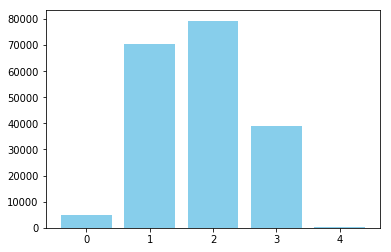

In [66]:
print(df['processState_Pre'].value_counts())
table = itemfreq(Y)
x_ticks = ['0','1','2','3','4'] 
# 0 : 보호중, 1:입양,기증, 2:자연사,안락사, 3:반환, 4:방사,미포획
plt.bar(x_ticks, table[:,1], color='skyblue')
table[:,1]

###### 2) processState_A 기준

In [67]:
Z=np.array(df_A.drop(columns='processState_A')) #종속변수
Q=np.array(df_A.processState_A) #독립변수
Z2=np.array(dft_A.drop(columns='processState_A')) #종속변수
Q2=np.array(dft_A.processState_A) #독립변수

In [ ]:
print(df_A['processState_A'].value_counts())
table = itemfreq(Q)
x_ticks = ['0','1'] # 0 : 입양X, 1:입양O
plt.bar(x_ticks, table[:,1], color='pink')
table[:,1]

##### - 데이터셋 나누기

In [68]:
# 15/16/17 train 데이터 
print(X.shape)
print(Y.shape)
print(Z.shape)
print(Q.shape)

(193784, 9)
(193784,)
(193784, 9)
(193784,)


In [69]:
#18년도 test 데이터
print(X2.shape)
print(Y2.shape)
print(Z2.shape)
print(Q2.shape)

(60813, 9)
(60813,)
(60813, 9)
(60813,)


In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=5)
#Z_train, Z_test, Q_train, Q_test = train_test_split(Z,Q,test_size=0.3, random_state=5)

# train_test_split
# : 데이터를  train set과 test set으로 단순분리
# : 원래 트레이닝 데이터와 결과값이 X와 Y를 무작위로 섞은 후 test_size로 주어진 비율만큼 나눔
# test_size 0.3은 X와 Y를 무작위로 섞은 후에 70%은 train으로, 30%는 test로 하는것
# random_state : 난수발생을 위한 seed의 인자값

#### - 모형 적용

##### KNN

In [70]:
# knn객체 : 훈련데이터로 모델을 만들고 새로운 데이터포인트에 대해 예측하는 알고리즘을 캡슐화
# 또한 알고리즘이 훈련데이터로부터 추출한 정보를 담고 있음
# KNeighborsClassifier : 훈련데이터 자체를 저장
knn_Pre = KNeighborsClassifier(n_neighbors=1) # n_neighbor : 이웃의 갯수
knn_A = KNeighborsClassifier(n_neighbors=1) # n_neighbor : 이웃의 갯수
print(knn_Pre)
print(knn_A)
# fit() : 훈련데이터셋으로부터 모델 만들기, knn객체 자체를 반환, 그리고 knn객체 자체를 변경시킴, knn객체가 문자열 형태로 출력됨
#출력에서 모델으르생성할떄 사용한 매개변수 확인 가능
# 훈련데이터(Numpy배열 X_train), 훈련데이터레이블(Numpy배열 y_train)을 매개변수로 받음
knn_Pre.fit(X, Y)
knn_A.fit(Z, Q)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

##### Logistic Regression

In [71]:
glm_Pre = LogisticRegression()
glm_A = LogisticRegression()

glm_Pre.fit(X, Y)
glm_A.fit(Z, Q)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Naive Bayes

In [ ]:
GNB_Pre = GaussianNB()
GNB_A = GaussianNB()
print(GNB_Pre)
print(GNB_A)

GNB_Pre.fit(X, Y)
GNB_A.fit(Z, Q) 

##### Tree

In [ ]:
depth_grid = np.arange(2,31,2)
parameters = {'max_depth':depth_grid}

gridCV_Pre = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
gridCV_A = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)

gridCV_Pre.fit(X, Y);
gridCV_A.fit(Z, Q);

best_depth_Pre = gridCV_Pre.best_params_['max_depth']
best_depth_A = gridCV_A.best_params_['max_depth']

print("Tree best depth : " + str(best_depth_Pre))
print("Tree best depth : " + str(best_depth_A))

In [ ]:
DTC_best_Pre = DecisionTreeClassifier(max_depth=best_depth_Pre)
DTC_best_A = DecisionTreeClassifier(max_depth=best_depth_A)

DTC_best_Pre.fit(X, Y);
DTC_best_A.fit(Z, Q);

##### Random Forest

In [ ]:
estimator_grid = np.arange(1, 30, 5)
depth_grid = np.arange(1, 10, 2)
parameters = {'n_estimators': estimator_grid, 'max_depth': depth_grid}

gridCV_Pre = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)
gridCV_A = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)

gridCV_Pre.fit(X, Y);
gridCV_A.fit(Z, Q);

best_n_estim_Pre = gridCV_Pre.best_params_['n_estimators']
best_depth_Pre = gridCV_Pre.best_params_['max_depth']

best_n_estim_A = gridCV_A.best_params_['n_estimators']
best_depth_A = gridCV_A.best_params_['max_depth']

In [ ]:
print("Random Forest best n estimator : " + str(best_n_estim_Pre))
print("Random Forest best depth : " + str(best_depth_Pre))

print("Random Forest best n estimator : " + str(best_n_estim_A))
print("Random Forest best depth : " + str(best_depth_A))

In [ ]:
RF_best_Pre = RandomForestClassifier(max_depth=best_depth_Pre,n_estimators=best_n_estim_Pre,random_state=3)
RF_best_A = RandomForestClassifier(max_depth=best_depth_A,n_estimators=best_n_estim_A,random_state=3)

RF_best_Pre.fit(X, Y);
RF_best_A.fit(Z, Q);

##### AdaBoost

In [ ]:
estimator_grid = np.arange(30, 80, 10)
learning_rate_grid = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
parameters = {'n_estimators': estimator_grid, 'learning_rate': learning_rate_grid}

gridCV_Pre = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=10)
gridCV_A = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=10)

gridCV_Pre.fit(X, Y)
gridCV_A.fit(Z, Q)

best_n_estim_Pre = gridCV_Pre.best_params_['n_estimators']
best_learn_rate_Pre = gridCV_Pre.best_params_['learning_rate']

best_n_estim_A = gridCV_A.best_params_['n_estimators']
best_learn_rate_A = gridCV_A.best_params_['learning_rate']

In [ ]:
print("Ada Boost best n estimator : " + str(best_n_estim_Pre))
print("Ada Boost best learning rate : " + str(best_learn_rate_A))

print("Ada Boost best n estimator : " + str(best_n_estim_Pre))
print("Ada Boost best learning rate : " + str(best_learn_rate_A))

In [ ]:
AB_best_Pre = AdaBoostClassifier(n_estimators=best_n_estim_Pre,learning_rate=best_learn_rate_Pre,random_state=3)
AB_best_A = AdaBoostClassifier(n_estimators=best_n_estim_A,learning_rate=best_learn_rate_A,random_state=3)

AB_best_Pre.fit(X, Y);
AB_best_A.fit(Z, Q);

##### SVM (Support Vector Machine)

In [ ]:
C_grid = [0.001, 0.01, 0.1, 1, 10]
gamma_grid = [0.001, 0.01, 0.1, 1]
parameters = {'C': C_grid, 'gamma' : gamma_grid}

gridCV_Pre = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10);
gridCV_Pre.fit(X, Y)

gridCV_A = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10);
gridCV_A.fit(Z, Q)


best_C_Pre = gridCV_Pre.best_params_['C']
best_gamma_Pre = gridCV_Pre.best_params_['gamma']

best_C_A = gridCV_A.best_params_['C']
best_gamma_A = gridCV_A.best_params_['gamma']

In [ ]:
print("SVM best C : " + str(best_C_Pre))
print("SVM best gamma : " + str(best_gamma_Pre))

print("SVM best C : " + str(best_C_A))
print("SVM best gamma : " + str(best_gamma_A))

In [ ]:
SVM_best_Pre = SVC(C=best_C_Pre,gamma=best_gamma_Pre)
SVM_best_Pre.fit(X, Y);

SVM_best_A = SVC(C=best_C_A,gamma=best_gamma_A)
SVM_best_A.fit(Z, Q);

#### - 예측 및 검증

In [ ]:
X_new = np.array([[5,1,0,4.5,0,1,11,2,12]])
Z_new = np.array([[5,1,0,4.5,0,1,11,2,12]])
print("X_new.shape : {}".format(X_new.shape))
print("Z_new.shape : {}".format(Z_new.shape))

In [ ]:
# X_new = np.array([[0,3,11,2,1,0,0,1,1,0,0,0,0,0,1,0,0,4,3]])
# Z_new = np.array([[0,3,11,2,1,0,0,1,1,0,0,0,0,0,1,0,0,4,3]])
# print("X_new.shape : {}".format(X_new.shape))
# print("Z_new.shape : {}".format(Z_new.shape))

In [ ]:
target_Pre = {0:'보호중', 1:'입양기증', 2:'자연사안락사', 3:'반환', 4:'방사미포획'}
target_A = {0:'입양X', 1:'입양O'}

##### KNN

In [ ]:
prediction_Pre = knn_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = knn_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = knn_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = knn_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "KNN best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "KNN best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### Logistic Regression

In [ ]:
prediction_Pre = glm_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = glm_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = glm_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = glm_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "Logistic Regression best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "Logistic Regression best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### Naive Bayes

In [ ]:
prediction_Pre = GNB_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = GNB_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = GNB_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = GNB_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "Naive Bayes best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "Naive Bayes best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### Tree

In [ ]:
prediction_Pre = DTC_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = DTC_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = DTC_best_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = DTC_best_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### Random Forest

In [ ]:
prediction_Pre = RF_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = RF_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred =RF_best_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = RF_best_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### AdaBoost

In [ ]:
prediction_Pre = AB_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = AB_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred =AB_best_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = AB_best_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "Ada Boost best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "Ada Boost best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### SVM (Support Vector Machine)

In [ ]:
prediction_Pre = SVM_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = SVM_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred =SVM_best_Pre.predict(X2) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = SVM_best_A.predict(Z2) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(Y2,Y_pred),3)))
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(Q2,Q_pred),3)))

##### - 검증2

In [ ]:
# 예측값 y_pred와 기존의 정답인 y_test가 맞는지 확인
print("테스트 셋에 대한 정확도 : {:.2f}".format(np.mean(Y_pred == Y_test)))
print("테스트 셋에 대한 정확도 : {:.2f}".format(np.mean(Z_pred == Z_test)))

In [ ]:
print("테스트 셋트에 대한 정확도 : {:.2f}".format(knn_Pre.score(X_test, Y_test)))
print("테스트 셋트에 대한 정확도 : {:.2f}".format(knn_A.score(Z_test, Q_test)))